HANDWRITTEN DIGIT RECOGNIZER USING CNN (KMNISET DATASET)


INTRODUCTION

This project builds a Convolutional Neural Network (CNN) to recognize handwritten digits from the MNIST dataset. It shows how deep learning can be used for simple image classification tasks.
It has real-world applications such as:
* OCR in mobile applications
* Postal code recognition

In [1]:
#Step 1 : Import all the libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
#Step 2 : Load and Process the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN (batch, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [3]:
#Step 3 : Build Model

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape         ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d (Conv2D)             │ (None, 26, 26, 32)   │         320 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ max_pooling2d               │ (None, 13, 13, 32)   │           0 │
│ (MaxPooling2D)              │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ conv2d_1 (Conv2D)           │ (None, 11, 11, 64)   │      18,496 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ max_pooling2d_1             │ (None, 5, 5, 64)     │           0 │
│ (MaxPooling2D)              │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ flatten (Flatten)           │ (None, 1600)         │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense (Dense)               │ (None, 128)          │     204,928 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_1 (Dense)             │ (None, 10)           │       1,290 │
└─────────────────────────────┴──────────────────────┴─────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Step 4 : Train the Model 

history = model.fit(
    x_train, y_train_cat,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 64s 36ms/step - accuracy: 0.9581 - loss: 0.1378 - val_accuracy: 0.9842 - val_loss: 0.0561
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 61s 36ms/step - accuracy: 0.9858 - loss: 0.0447 - val_accuracy: 0.9875 - val_loss: 0.0420
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 63s 37ms/step - accuracy: 0.9903 - loss: 0.0310 - val_accuracy: 0.9893 - val_loss: 0.0376
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.9928 - loss: 0.0224 - val_accuracy: 0.9902 - val_loss: 0.0362
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 77s 34ms/step - accuracy: 0.9946 - loss: 0.0166 - val_accuracy: 0.9922 - val_loss: 0.0350


In [5]:
## Step 5: Evaluate on Test Data

test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


✅ Test Accuracy: 99.10%
Test Loss: 0.0271


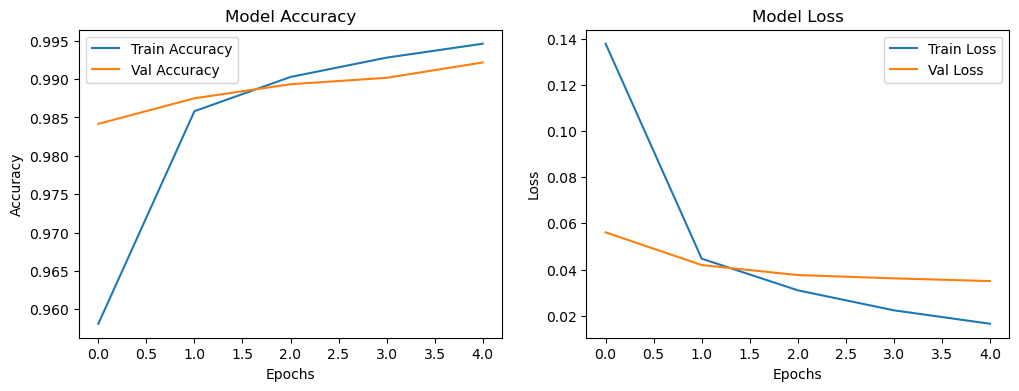

In [6]:
## Step 6: Visualization of Training

plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()
